# What is a Bayesian Network?
### A Bayesian Network (BN) is a probabilistic graphical model that represents a set of variables and their conditional dependencies using a directed acyclic graph (DAG). It is used to model uncertainty, capture dependencies between variables, and reason probabilistically.

# In a Bayesian Network:
<ul>
<li>Nodes represent random variables (which could be observable quantities, latent variables, or unknown parameters).</li>
<li>
Directed edges (arrows) represent conditional dependencies between these variables.</li>
<li>Each node has a Conditional Probability Distribution (CPD) that quantifies the effect of the parent nodes on the node.<li></ul>
The structure of the network reflects the causal relationships or dependencies among variables, and it allows us to compute joint, marginal, and conditional probabilities efficiently.


# Components of a Bayesian Network
### Nodes (Variables):
<ui><li>Each node represents a random variable. These variables could be binary (e.g., Spam/Not Spam) or multivalued (e.g., Weather: Sunny, Rainy, Cloudy).</li></ui>

### Directed Edges (Dependencies):
<ui><li>A directed edge from node A to node B means that B depends on A. In other words, A influences B.</li></ui>

### Conditional Probability Distributions (CPDs):
<ui><li>Each node is associated with a CPD that quantifies the likelihood of that node given its parent nodes. For instance, the CPD for the node "Spam" could express how likely a particular word (like "offer") is to appear in spam emails.</li></ui>


In [1]:
!pip install pgmpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.5 MB/s eta 0:00:00


In [11]:
# Install the required libraries first by running:
# pip install pgmpy matplotlib networkx

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
# Create a Bayesian Network model
model = BayesianNetwork([
    ('Spam', 'Word_Offer'),
    ('Spam', 'Word_Win'),
    ('Spam', 'Word_Free'),
    ('Spam', 'Word_Meeting'),
    ('Spam', 'Word_Schedule')
])

In [13]:
# Define Conditional Probability Distributions (CPDs)
# Spam: 1 = Spam, 0 = Not Spam
# Word_X: 1 = Word present, 0 = Word absent
cpd_spam = TabularCPD(variable='Spam', variable_card=2, values=[[0.4], [0.6]])  # 40% Not Spam, 60% Spam

cpd_word_offer = TabularCPD(variable='Word_Offer', variable_card=2,
                            values=[[0.7, 0.2], [0.3, 0.8]], evidence=['Spam'], evidence_card=[2])
cpd_word_win = TabularCPD(variable='Word_Win', variable_card=2,
                          values=[[0.8, 0.1], [0.2, 0.9]], evidence=['Spam'], evidence_card=[2])
cpd_word_free = TabularCPD(variable='Word_Free', variable_card=2,
                           values=[[0.9, 0.3], [0.1, 0.7]], evidence=['Spam'], evidence_card=[2])
cpd_word_meeting = TabularCPD(variable='Word_Meeting', variable_card=2,
                              values=[[0.1, 0.6], [0.9, 0.4]], evidence=['Spam'], evidence_card=[2])
cpd_word_schedule = TabularCPD(variable='Word_Schedule', variable_card=2,
                               values=[[0.2, 0.7], [0.8, 0.3]], evidence=['Spam'], evidence_card=[2])

In [14]:
# Add CPDs to the model
model.add_cpds(cpd_spam, cpd_word_offer, cpd_word_win, cpd_word_free, cpd_word_meeting, cpd_word_schedule)

In [15]:
# Check if the model is valid
assert model.check_model(), "Model is invalid!"

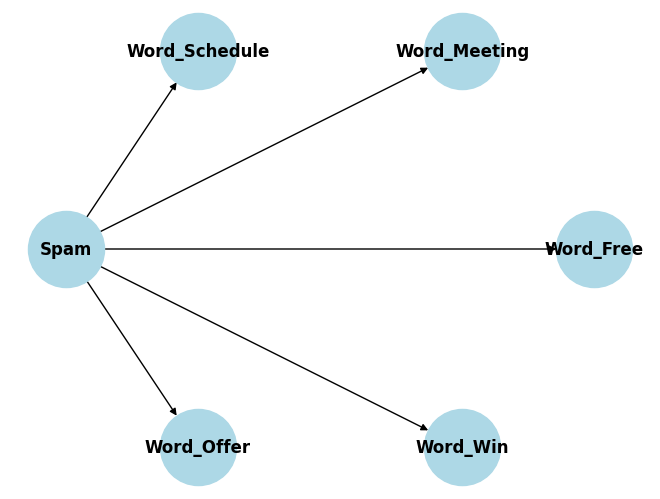

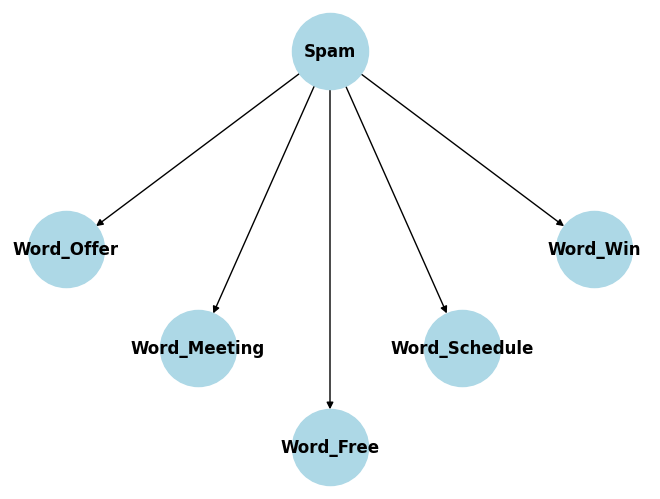

In [16]:
# Visualize the Bayesian Network

# Use a simple shell layout
pos = nx.shell_layout(model)
nx.draw(model, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold')
plt.show()

# Alternatively, manually define positions
manual_pos = {
    'Spam': (0, 1),
    'Word_Offer': (-1, 0),
    'Word_Win': (1, 0),
    'Word_Free': (0, -1),
    'Word_Meeting': (-0.5, -0.5),
    'Word_Schedule': (0.5, -0.5)
}

nx.draw(model, manual_pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold')
plt.show()

# Optional: Close any previous plots to avoid conflicts
plt.close('all')